In [16]:
import msprime, tskit
from IPython.display import SVG
import numpy as np

In [32]:
ts = msprime.sim_ancestry(3, population_size=1000, sequence_length=1e5, recombination_rate=1e-8)

In [33]:
ts.num_trees

11

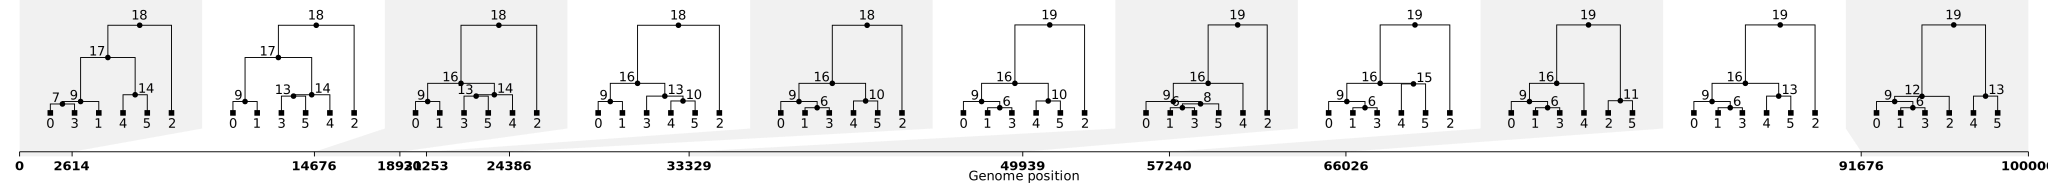

In [34]:
SVG(ts.draw_svg())

First, et's try to find out how many edges are extendable.
To do this, we'll



In [57]:
edgediffs = ts.edge_diffs()
trees1 = ts.trees()
trees2 = ts.trees()
_ = next(trees1)
_ = next(edgediffs)


t = ts.tables
edges = t.edges
new_left = edges.left
new_right = edges.right
pending_in = []
pending_out = []

max_n = 10

# note we skip the first tree
for last_tree, next_tree, (interval, edges_out, edges_in) in zip(trees2, trees1, edgediffs):
    assert interval == next_tree.interval
    for e1 in edges_out + pending_out:
        # assert last_tree.parent(e1.child) == e1.parent
        for e2 in edges_out + pending_out:
            if e1.parent == e2.child:
                for e_in in edges_in + pending_in:
                    if e_in.right > interval.left:
                        # assert next_tree.parent(e_in.child) == e_in.parent
                        if e1.child == e_in.child and e2.parent == e_in.parent:
                            print(interval, e1.child, "-", e1.parent, "-", e2.parent, " -> ", e_in)
                            max_n -= 1
                            if max_n <= 0:
                                assert False
                            print("ping!!")
                            # extend e1 and e2, postpone e_in
                            pending_out.extend([e1, e2])
                            pending_in.append(e_in)
                            new_right[e1.id] = interval.right
                            new_right[e2.id] = interval.right
                            new_left[e_in.id] = interval.right

Interval(left=2614.0, right=14676.0) 0 - 7 - 9  ->  Edge(left=2614.0, right=100000.0, parent=9, child=0, metadata=b'', id=6)
ping!!
Interval(left=14676.0, right=18931.0) 0 - 7 - 9  ->  Edge(left=2614.0, right=100000.0, parent=9, child=0, metadata=b'', id=6)
ping!!
Interval(left=18931.0, right=20253.0) 13 - 14 - 16  ->  Edge(left=18931.0, right=20253.0, parent=16, child=13, metadata=b'', id=32)
ping!!
Interval(left=18931.0, right=20253.0) 0 - 7 - 9  ->  Edge(left=2614.0, right=100000.0, parent=9, child=0, metadata=b'', id=6)
ping!!
Interval(left=18931.0, right=20253.0) 0 - 7 - 9  ->  Edge(left=2614.0, right=100000.0, parent=9, child=0, metadata=b'', id=6)
ping!!
Interval(left=18931.0, right=20253.0) 0 - 7 - 9  ->  Edge(left=2614.0, right=100000.0, parent=9, child=0, metadata=b'', id=6)
ping!!
Interval(left=18931.0, right=20253.0) 0 - 7 - 9  ->  Edge(left=2614.0, right=100000.0, parent=9, child=0, metadata=b'', id=6)
ping!!
Interval(left=18931.0, right=20253.0) 0 - 7 - 9  ->  Edge(left=2

AssertionError: 

In [ ]:
keep = new_left < new_right
edges.set_columns(
    left=new_left[keep],
    right=new_right[keep],
    parent=edges.parent[keep],
    child=edges.child[keep])
new_ts = t.tree_sequence()
SVG(new_ts.draw_svg())

In [18]:
edges_out

[Edge(left=71941.0, right=83435.0, parent=17, child=13, metadata=b'', id=29),
 Edge(left=71941.0, right=83435.0, parent=17, child=12, metadata=b'', id=28)]